In [221]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from drive.model_training.data_utils.extractors import *
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Product, ConstantKernel
import matplotlib.cm as cm 

# First define the dataset which is X and Y 

x is the vector containing the vyaw and vx values. 
Y is a 1D vector containing the slip of either X, Y or Yaw.

In [222]:
path = "/home/nicolassamson/ros2_ws/src/DRIVE/drive_datasets/results_multiple_terrain_dataframe/filtered_cleared_path_warthog_max_lin_speed_5.0_all_terrain_steady_state_dataset.pkl"

df = pd.read_pickle(path)

df = df.loc[df.terrain=="sand"]
vx = column_type_extractor(df,"cmd_body_x_lwmean")
vyaw = column_type_extractor(df,"cmd_body_yaw_lwmean")

y = column_type_extractor(df,"slip_body_x_ss")
X = np.concat((vyaw,vx),axis=1)


            

### Let's find alpha the cov matrix 

# Assuming that we train on all the dataset

In [223]:
X_train = X
y_train = y

# Lets pick the kernel 
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(0.02, 1e10))
print(kernel)

# Define length scales for each feature
length_scales = [1.0, 2.0]  # Example length scales for each feature

# Create separate RBF kernels for each feature
kernel1 = RBF(length_scale=length_scales[0])
kernel2 = RBF(length_scale=length_scales[1])

# Combine the kernels using Product
combined_kernel = Product(kernel1, kernel2)

1**2 * RBF(length_scale=1)


In [224]:
X_train = X
y_train = y

# Lets pick the kernel 
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(0.02, 1e10))
print(kernel)
# Now let's train the Kernel 
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,alpha=0.22)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

1**2 * RBF(length_scale=1)


0.94**2 * RBF(length_scale=3.15)

# Creating a mesgrid to evaluate the local function

In [225]:

# Define the ranges for x and y
x_lim = np.linspace(-6, 6, 100)  # 100 points from -5 to 5
y_lim = np.linspace(-6, 6, 100)  # 100 points from -5 to 5

# Create the meshgrid
X_2do, Y_2do = np.meshgrid(x_lim, y_lim)

x_2_eval = np.array((np.ravel(X_2do),np.ravel(Y_2do))).T

mean_prediction, std_prediction = gaussian_process.predict(x_2_eval, return_std=True)

In [229]:
def graph_scatter_valid(vx,vyaw,X,y):
    r = 4.4
    theta = np.linspace(0,2*np.pi,101)

    x_test = r*np.cos(theta)
    y_test = r*np.sin(theta)
    print(1/r)

    fig, ax = plt.subplots(1,1)
    ax.set_aspect("equal")
    ax.scatter(vyaw,vx)
    ax.scatter(x_test,y_test)

    print("var vyaw",np.var(vyaw))
    print("var vx",np.var(vx))

    print("covariance matrix \n",np.cov(X.T))

    alpha = np.cov(X.T)
    print(np.var(y))

def plot_image(X_train,mean_prediction,col,y):
    fig, ax = plt.subplots(1,1,figsize=(8, 6))

    cmap = plt.get_cmap("inferno")
    scatter_color = cmap(y,)

    im = ax.imshow(mean_prediction.reshape((100,100)),extent=(-6, 6, -6, 6), origin='lower', cmap='inferno', vmin=np.min(y), vmax=np.max(y))
    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Mean Prediction')  # Optional label for the colorbar

    ax.set_title(f"Results of the GP training over {col} ")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

    
    scatter = ax.scatter(X_train[:,0],X_train[:,1],c=y,cmap="inferno",edgecolor='white')

    # Add the second colorbar
    cbar2 = plt.colorbar(scatter, ax=ax)
    cbar2.set_label('Scatter') 
def find_the_surface(df,col_interest,debug=False):
    
    # Extract the values 
    vx = np.ravel(column_type_extractor(df,"cmd_body_x_lwmean"))
    vyaw = np.ravel(column_type_extractor(df,"cmd_body_yaw_lwmean"))

    y = np.ravel(column_type_extractor(df,col_interest))
    X = np.array((vyaw,vx)).T


    
    # Normalize the mean_prediction for color mapping
    norm = plt.Normalize(vmin=np.min(y), vmax=np.max(y))

    X_train = X
    y_train = y # /norm
    
    

    # Lets pick the kernel 
    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(0.02, 100))
    print(kernel)
    # Now let's train the Kernel 
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,alpha=0.22)
    gaussian_process.fit(X_train, y_train)
    print(gaussian_process.kernel_)

    # Predict the grid 


    # Define the ranges for x and y
    x_lim = np.linspace(-6, 6, 100)  # 100 points from -5 to 5
    y_lim = np.linspace(-6, 6, 100)  # 100 points from -5 to 5

    # Create the meshgrid
    X_2do, Y_2do = np.meshgrid(x_lim, y_lim)

    x_2_eval = np.array((np.ravel(X_2do),np.ravel(Y_2do))).T

    mean_prediction, std_prediction = gaussian_process.predict(x_2_eval, return_std=True)

    if debug:
        #graph_scatter_valid(vx,vyaw,X,y)
        plot_image(X_train,mean_prediction,col_interest,y)



1**2 * RBF(length_scale=1)
0.894**2 * RBF(length_scale=2.98)
1**2 * RBF(length_scale=1)
0.224**2 * RBF(length_scale=2.85)
1**2 * RBF(length_scale=1)
2.13**2 * RBF(length_scale=6.87)


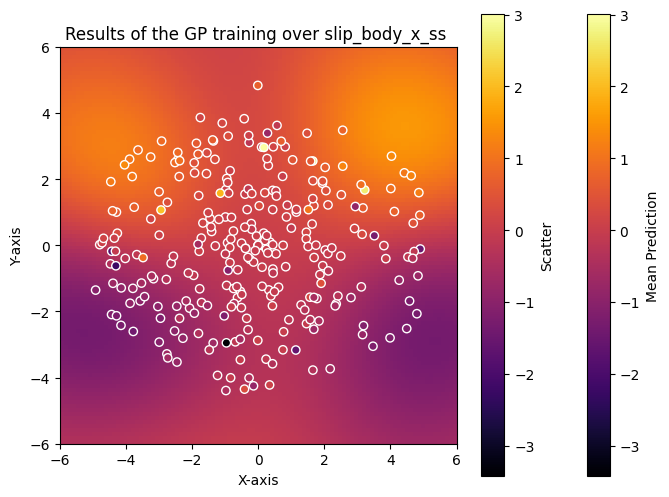

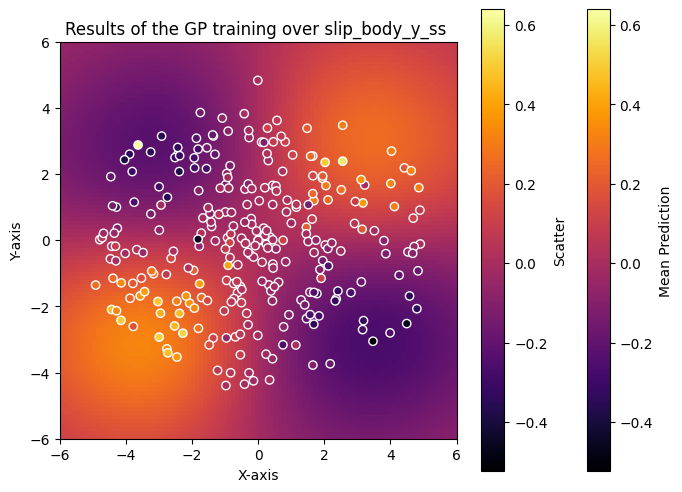

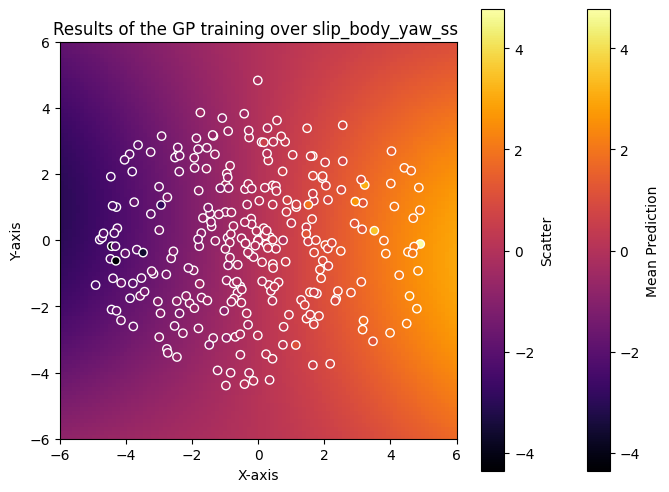

In [230]:
path = "/home/nicolassamson/ros2_ws/src/DRIVE/drive_datasets/results_multiple_terrain_dataframe/filtered_cleared_path_warthog_max_lin_speed_all_speed_all_terrain_steady_state_dataset.pkl"

df = pd.read_pickle(path)

df = df.loc[df.terrain=="grass"]
find_the_surface(df,"slip_body_x_ss",debug=True)
find_the_surface(df,"slip_body_y_ss",debug=True)
find_the_surface(df,"slip_body_yaw_ss",debug=True)

In [232]:
norm_slip_yaw_ss = plt.Normalize(vmin=np.min(df.slip_body_y_ss), vmax=np.max(df.slip_body_yaw_ss))

norm_slip_yaw_ss.vmax

4.7734575599520275